# Project: Energy Production, Consumption and CO<sub>2</sub> Emission Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In this project, I'll be analysing data associated with total energy produced and consumed in different countries over about two decades, and the Consumption CO2 per capita for the people in the countries. 

**Project Aim**

The main aim of this project it to explore trends on energy production, consumption and CO<sub>2</sub> emissions within two decades from around the world. The research questions include:

* Which countries are the top and least energy producers?
* Which countries consume the most and least energy?
* Which countries are the highest and lowest CO<sub>2</sub> emitters?

> **3 datasets where used:**: 
* **Energy Production dataset** - `energy_production_total.csv`. Description: Energy production refers to forms of primary energy--petroleum (crude oil, natural gas liquids, and oil from nonconventional sources), natural gas, solid fuels (coal, lignite, and other derived fuels), and combustible renewables and waste--and primary electricity, all converted into tonnes of oil equivalents. 
     > 
     * Unit of measurement: Tonnes of oil equivalent (toe)
     > 
     * Source: [World Bank, 2010](https://data.worldbank.org/indicator/EG.EGY.PROD.KT.OE)  
     > 
* **Energy Consumption dataset** - `'energy_use_per_person.csv`. Description: Energy use refers to use of primary energy before transformation to other end-use fuels, which is equal to indigenous production plus imports and stock changes, minus exports and fuels supplied to ships and aircraft engaged in international transport.
     > 
     * Unit of measurement: Kg of oil equivalent per capita
     > 
     * Source: [World Bank, 2015](https://data.worldbank.org/indicator/EG.USE.PCAP.KG.OE)
     > 
* **Consumption CO<sub>2</sub> per capita dataset** - `consumption_emissions_tonnes_per_person.csv`. Description: Per capita carbon dioxide emissions from the fossil fuel consumption, cement production and gas flaring, minus export, plus import during the given year.
     > 
     * Unit of measurement: Metric tons of CO2 per person
     > 
     * Source: [Gapminder](https://github.com/open-numbers/ddf--gapminder--co2_emission)


In [1]:
# Setting up import statements for all of the packages that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section, I load the datasets, and explore them for cleanliness, and then trim and clean the datasets for analysis based on the observations made. For each dataset, I cleaned completely before moving to the next dataset.

### General Properties

In [2]:
#Loading energy production dataset
df_energy_prod = pd.read_csv('energy_production_total.csv')
print(df_energy_prod.shape)
df_energy_prod.head(2)

(135, 52)


,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.5k,51.4k,51.4k,57.6k,70.9k,80k,95k,106k,101k,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,883,959,1050,1150,1170,1190,1060,1150,1250,NaN


In [3]:
#Loading energy consumption dataset
df_energy_usepp = pd.read_csv('energy_use_per_person.csv')
print(df_energy_usepp.shape)
df_energy_usepp.head(2)

(173, 57)


,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,459,472,492,515,521,522,552,534,545,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,707,680,711,732,729,765,688,801,808,NaN


In [4]:
#Loading CO2 dataset
df_co2_consump = pd.read_csv('consumption_emissions_tonnes_per_person.csv')
print(df_co2_consump.shape)
df_co2_consump.head(3)

(119, 29)


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Albania,1.71,1.39,0.875,0.824,0.729,0.792,0.926,0.707,0.808,...,2.04,2.14,2.08,2.17,2.08,2.02,2.17,1.96,1.9,1.96
1,United Arab Emirates,30.20,31.50,30.900,31.400,32.800,31.100,30.800,29.500,32.700,...,34.50,25.20,22.70,24.20,26.10,26.70,27.70,24.80,25.0,24.80
2,Argentina,3.20,3.40,3.520,3.420,3.480,3.490,3.670,3.820,3.830,...,4.41,4.07,4.33,4.47,4.48,4.58,4.62,4.70,4.6,4.59


In [5]:
# Exploring energy production dataset
df_energy_prod.describe()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
count,135,25,25,25,25,25,26,26,26,26,...,135,135,135,135,135,135,135,135,135,34
unique,135,25,25,25,25,25,26,26,26,25,...,126,129,133,126,129,129,128,130,129,34
top,India,14k,9950,127k,47.2k,75.7k,89.7k,6590,44.4k,113k,...,152k,384k,1670,28.4k,3810,3750,22.1k,71.4k,15.3k,6140
freq,1,1,1,1,1,1,1,1,1,2,...,2,2,2,3,2,2,3,2,2,1


In [6]:
df_energy_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 52 columns):
country    135 non-null object
1960       25 non-null object
1961       25 non-null object
1962       25 non-null object
1963       25 non-null object
1964       25 non-null object
1965       26 non-null object
1966       26 non-null object
1967       26 non-null object
1968       26 non-null object
1969       26 non-null object
1970       26 non-null object
1971       110 non-null object
1972       110 non-null object
1973       110 non-null object
1974       110 non-null object
1975       110 non-null object
1976       110 non-null object
1977       110 non-null object
1978       110 non-null object
1979       110 non-null object
1980       110 non-null object
1981       111 non-null object
1982       111 non-null object
1983       111 non-null object
1984       111 non-null object
1985       112 non-null object
1986       112 non-null object
1987       112 non-null object
1988   

In [7]:
# Exploring energy consumption dataset
df_energy_usepp.describe()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,173,25,25,25,25,25,26,26,26,26,...,171,171,141,141,141,141,141,141,135,34
unique,173,24,25,25,23,24,25,24,26,25,...,166,166,132,130,134,130,133,135,126,33
top,Belgium,1830,2020,3170,3280,434,3440,3070,2200,497,...,306,1440,1030,1010,3350,944,1070,801,2030,2820
freq,1,2,1,1,2,2,2,2,1,2,...,2,2,3,3,2,3,3,2,3,2


In [8]:
df_energy_usepp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 57 columns):
country    173 non-null object
1960       25 non-null object
1961       25 non-null object
1962       25 non-null object
1963       25 non-null object
1964       25 non-null object
1965       26 non-null object
1966       26 non-null object
1967       26 non-null object
1968       26 non-null object
1969       26 non-null object
1970       26 non-null object
1971       112 non-null object
1972       112 non-null object
1973       112 non-null object
1974       112 non-null object
1975       112 non-null object
1976       112 non-null object
1977       112 non-null object
1978       112 non-null object
1979       112 non-null object
1980       112 non-null object
1981       113 non-null object
1982       113 non-null object
1983       113 non-null object
1984       113 non-null object
1985       114 non-null object
1986       114 non-null object
1987       114 non-null object
1988   

In [9]:
# Exploring CO2 dataset
df_co2_consump.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,6.127927,6.251313,6.099986,6.220313,6.248197,6.225991,6.394773,6.312797,6.331803,5.758518,...,7.118845,6.654396,6.776388,6.515066,6.861876,6.836869,6.811306,6.713694,6.668721,6.705733
std,6.670418,6.963664,7.171849,7.665742,7.778913,7.669475,7.734067,7.778098,7.372435,6.084259,...,7.859694,7.398857,7.274409,6.148213,7.172980,7.029964,7.064557,6.966097,6.847216,6.847705
min,0.000000,0.066700,0.071500,0.073400,0.058400,0.063300,0.067000,0.072100,0.069200,0.067000,...,0.055500,0.057100,0.057200,0.062900,0.068200,0.072400,0.073400,0.081600,0.089800,0.091200
25%,0.711500,0.749000,0.791000,0.793000,0.793000,0.815500,0.950500,0.974500,1.035000,1.100000,...,1.180000,1.225000,1.320000,1.320000,1.370000,1.355000,1.400000,1.525000,1.620000,1.680000
50%,3.840000,3.830000,3.360000,3.420000,3.240000,3.290000,3.670000,3.730000,3.790000,3.660000,...,4.590000,4.430000,4.410000,4.590000,5.000000,5.130000,4.880000,4.950000,4.900000,4.860000
75%,9.625000,10.100000,9.480000,9.190000,9.380000,9.575000,9.505000,9.340000,9.710000,9.225000,...,11.050000,10.550000,10.650000,10.080000,10.080000,9.815000,9.485000,9.270000,9.310000,9.190000
max,31.100000,32.300000,42.200000,48.200000,47.400000,49.500000,50.100000,52.800000,44.400000,27.000000,...,49.600000,50.700000,47.900000,27.000000,44.500000,43.100000,40.900000,41.300000,39.800000,39.800000


In [10]:
df_co2_consump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 29 columns):
country    119 non-null object
1990       119 non-null float64
1991       119 non-null float64
1992       119 non-null float64
1993       119 non-null float64
1994       119 non-null float64
1995       119 non-null float64
1996       119 non-null float64
1997       119 non-null float64
1998       119 non-null float64
1999       119 non-null float64
2000       119 non-null float64
2001       119 non-null float64
2002       119 non-null float64
2003       119 non-null float64
2004       119 non-null float64
2005       119 non-null float64
2006       119 non-null float64
2007       119 non-null float64
2008       119 non-null float64
2009       119 non-null float64
2010       119 non-null float64
2011       119 non-null float64
2012       119 non-null float64
2013       119 non-null float64
2014       119 non-null float64
2015       119 non-null float64
2016       119 non-null float64


#### Observations 1
* In both energy produced and consumed datasets, 25-26 countries have enteries from 1960-1970. This is a really small number, compared to the 135 countries. 
* 2010 in energy production dataset and 2015 in energy consumption dataset both have 34 enteries
* Also, the CO2 consumption dataset has only enteries from 1990, and from 119 countries. We might be dropping the rows in both energy datasets from 1960-1970. 
* The values are float types, not integers
* Case type in country column needs to be changed (for uniformity)
* There is are a lot of missing values in multiple columns in the energy consumption dataset

First, let us look at what countries are featured in the first decade.

In [11]:
#exploring the countries with values in the first decade

not_nullprod = df_energy_prod[df_energy_prod["1964"].notnull()]
not_nulluse = df_energy_usepp[df_energy_usepp["1964"].notnull()]

print(not_nullprod['country'])
print(not_nulluse['country'])

5           Australia
6             Austria
8             Belgium
19             Canada
20        Switzerland
32            Germany
33            Denmark
39              Spain
42            Finland
43             France
45     United Kingdom
49             Greece
58            Ireland
61            Iceland
63              Italy
66              Japan
77         Luxembourg
91        Netherlands
92             Norway
94        New Zealand
100            Poland
102          Portugal
115            Sweden
123            Turkey
127     United States
Name: country, dtype: object
6           Australia
7             Austria
9             Belgium
24             Canada
25        Switzerland
39            Germany
42            Denmark
48              Spain
51            Finland
53             France
55     United Kingdom
62             Greece
73            Ireland
76            Iceland
78              Italy
81              Japan
97         Luxembourg
116       Netherlands
118            Norway
120

In [12]:
not_nullprod.tail()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
100,Poland,64.8k,66.8k,68.7k,71.3k,75.7k,77.3k,79.9k,81.5k,85.8k,...,80.3k,80.2k,79.9k,78.8k,78.7k,77.6k,72.5k,71.4k,67.5k,67.8k
102,Portugal,1270,1320,1280,1320,1350,1370,1450,1470,1420,...,4100,3640,4340,3900,3610,4370,4650,4490,4890,5960
115,Sweden,5480,5930,6110,6000,6490,6770,6590,6930,6870,...,33.9k,31.8k,30.9k,34.3k,34.7k,32.8k,33.6k,33.2k,30.4k,32.5k
123,Turkey,9370,9480,9730,10.2k,10.6k,11.2k,12.2k,13.2k,13.5k,...,24.4k,24.1k,23.6k,24.1k,23.9k,26.4k,27.3k,29k,30.3k,30.3k
127,United States,965k,973k,1.01M,1.06M,1.1M,1.14M,1.2M,1.3M,1.34M,...,1.69M,1.66M,1.63M,1.65M,1.63M,1.65M,1.67M,1.7M,1.69M,1.74M


#### Observations 2
* The 25-26 countries that have enteries from 1960-1970 in both energy produced and consumed datasets are similar.
* Also, i can see that some values have K, decimal, and M. These figures for Energy Produced are measured in Tonnes of oil equivalent per capita. That is to say, that `17.6k` from Italy in 1968 is `17.6k tonnes of oil` and `1.34M` from USA in 1968 is `1.34 million tonnes of oil`.
* Case type in country column needs to be changed (for uniformity)

To do:
* Drop columns 1960-1970
* Change case type for the country column in all three datasets
* Explore 2010 column and 2015 column in the energy produced and energy consumed datasets respectively
* Change the values in the coulumns to integers, without k, M or decimal. `k` is interpreted as thousands while `M` is interpreted as million

### Cleaning Energy Production Dataset

In [13]:
#dropping columns that we don't need in df_energy_prod dataset
df_energy_prod.drop(['1960','1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989'], axis=1, inplace=True)


In [14]:
#changing case type for the country column in all three datasets
df_energy_prod['country'] = (df_energy_prod['country']
                             .str.lower()
                             .str.replace("-", "_")
                             .str.replace(" ", "_")
                             .str.replace(",","")
                             .str.replace(".","")
                            )

df_energy_usepp['country'] = (df_energy_usepp['country']
                             .str.lower()
                             .str.replace("-", "_")
                             .str.replace(" ", "_")
                             .str.replace(",","")
                             .str.replace(".","")
                            )
df_co2_consump['country'] = (df_co2_consump['country']
                             .str.lower()
                             .str.replace("-", "_")
                             .str.replace(" ", "_")
                             .str.replace(",","")
                             .str.replace(".","")
                            )

In [15]:
#verifying dropped columns and case types
df_energy_prod.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,angola,28.6k,30k,32.8k,30.5k,33k,36.4k,39.8k,41.6k,43k,...,43.5k,51.4k,51.4k,57.6k,70.9k,80k,95k,106k,101k,NaN
1,albania,2450,1920,1400,1330,1280,1240,1330,1100,1090,...,883,959,1050,1150,1170,1190,1060,1150,1250,NaN
2,united_arab_emirates,110k,127k,134k,131k,134k,137k,142k,147k,151k,...,152k,149k,163k,171k,174k,185k,186k,187k,169k,NaN
3,argentina,48.4k,50.2k,54.3k,57k,62.4k,66.9k,72k,77.5k,79.7k,...,84.5k,81.3k,84.3k,87.1k,84.7k,86.2k,82.9k,82.9k,80.8k,NaN
4,armenia,137,135,263,370,303,245,742,539,547,...,602,738,692,746,861,846,826,797,825,NaN


In [16]:
#understanding missing values in 2010 
not_nullprod_2010 = df_energy_prod[df_energy_prod['2010'].notnull()]
not_nullprod_2010

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
5,australia,158k,167k,172k,175k,174k,187k,190k,201k,217k,...,254k,264k,264k,269k,280k,282k,299k,301k,311k,324k
6,austria,8110,8350,8560,8770,8400,8740,8630,8710,8880,...,9780,9820,9600,9900,10.1k,10.1k,10.9k,11.2k,11.4k,11.2k
8,belgium,13.1k,13k,12.7k,12.1k,11.6k,11.9k,12.4k,13.4k,13.1k,...,13.3k,13.5k,13.7k,13.8k,13.9k,13.8k,14.4k,14.5k,15.3k,15.3k
19,canada,274k,285k,294k,316k,339k,349k,358k,365k,365k,...,377k,384k,386k,398k,401k,411k,416k,406k,390k,396k
20,switzerland,10.3k,10.4k,10.6k,10.9k,11.4k,11.2k,10.8k,11.3k,11.4k,...,12.6k,12.2k,12.3k,12.1k,11k,12.2k,12.7k,12.8k,12.8k,12.7k
21,chile,7470,7890,8180,7780,7860,7850,7870,7910,7650,...,8610,8600,8100,8080,8870,9160,8500,9060,9300,9560
31,czech_republic,40.9k,38.6k,36.3k,35.8k,33.3k,32.4k,33.1k,33.5k,31.5k,...,31.4k,31.4k,33.5k,34.5k,32.9k,33.6k,33.8k,32.8k,31.2k,31.4k
32,germany,186k,168k,163k,152k,145k,145k,143k,144k,136k,...,135k,135k,136k,138k,135k,136k,138k,134k,127k,129k
33,denmark,10.1k,11.9k,12.9k,13.9k,15.1k,15.6k,17.7k,20.2k,20.4k,...,27.1k,28.6k,28.5k,31.1k,31.3k,29.6k,27.1k,26.6k,23.9k,23.2k
39,spain,34.6k,34.3k,33.7k,32.9k,32.3k,31.5k,32.7k,31.7k,32.3k,...,33.5k,31.8k,33k,32.6k,30.1k,31.3k,30.3k,30.4k,29.7k,33.9k


These are the exact countries that had figures for 1960-1970. They probably have better reporting methods. I am going to drop the 2010 column as well.

In [17]:
#dropping NaN values in 2010 column with 0
df_energy_prod.drop(['2010'], axis=1, inplace=True)

In [18]:
#confirming the fillna
df_energy_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 21 columns):
country    135 non-null object
1990       132 non-null object
1991       133 non-null object
1992       134 non-null object
1993       134 non-null object
1994       134 non-null object
1995       135 non-null object
1996       135 non-null object
1997       135 non-null object
1998       135 non-null object
1999       135 non-null object
2000       135 non-null object
2001       135 non-null object
2002       135 non-null object
2003       135 non-null object
2004       135 non-null object
2005       135 non-null object
2006       135 non-null object
2007       135 non-null object
2008       135 non-null object
2009       135 non-null object
dtypes: object(21)
memory usage: 22.2+ KB


In [19]:
#removing Nan rows
df_energy_prod.dropna(inplace=True)
df_energy_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 134
Data columns (total 21 columns):
country    132 non-null object
1990       132 non-null object
1991       132 non-null object
1992       132 non-null object
1993       132 non-null object
1994       132 non-null object
1995       132 non-null object
1996       132 non-null object
1997       132 non-null object
1998       132 non-null object
1999       132 non-null object
2000       132 non-null object
2001       132 non-null object
2002       132 non-null object
2003       132 non-null object
2004       132 non-null object
2005       132 non-null object
2006       132 non-null object
2007       132 non-null object
2008       132 non-null object
2009       132 non-null object
dtypes: object(21)
memory usage: 22.7+ KB


Now that the data set have been cleaned of NaN values, the next step is to eliminate the k, M and decimals in the values, and convert to `int` type.

To do:
* Make the country column an index column
* Assign all the columns to a variable
* Use the replace function to eliminate the k, M and decimals

In [20]:
#Setting index column
df_energy_prod =df_energy_prod.set_index('country')
df_energy_prod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, angola to zimbabwe
Data columns (total 20 columns):
1990    132 non-null object
1991    132 non-null object
1992    132 non-null object
1993    132 non-null object
1994    132 non-null object
1995    132 non-null object
1996    132 non-null object
1997    132 non-null object
1998    132 non-null object
1999    132 non-null object
2000    132 non-null object
2001    132 non-null object
2002    132 non-null object
2003    132 non-null object
2004    132 non-null object
2005    132 non-null object
2006    132 non-null object
2007    132 non-null object
2008    132 non-null object
2009    132 non-null object
dtypes: object(20)
memory usage: 21.7+ KB


In [21]:
cols1 = df_energy_prod.columns
cols1

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009'],
      dtype='object')

In [22]:
#Addressing k, M and the decimal, and ensuring that the values are integers
df_energy_prod = df_energy_prod[cols1].replace({'k': '*1e3', 'M': '*1e6', }, regex=True).applymap(pd.eval).round(2).astype(int)
df_energy_prod.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
country,,,,,,,,,,,,,,,,,,,,
angola,28600,30000,32800,30500,33000,36400,39800,41600,43000,43500,43700,43500,51400,51400,57600,70900,80000,95000,106000,101000
albania,2450,1920,1400,1330,1280,1240,1330,1100,1090,1070,986,883,959,1050,1150,1170,1190,1060,1150,1250
united_arab_emirates,110000,127000,134000,131000,134000,137000,142000,147000,151000,143000,156000,152000,149000,163000,171000,174000,185000,186000,187000,169000
argentina,48400,50200,54300,57000,62400,66900,72000,77500,79700,80100,82300,84500,81300,84300,87100,84700,86200,82900,82900,80800
armenia,137,135,263,370,303,245,742,539,547,646,632,602,738,692,746,861,846,826,797,825


In [23]:
# Verifying changes
df_energy_prod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, angola to zimbabwe
Data columns (total 20 columns):
1990    132 non-null int64
1991    132 non-null int64
1992    132 non-null int64
1993    132 non-null int64
1994    132 non-null int64
1995    132 non-null int64
1996    132 non-null int64
1997    132 non-null int64
1998    132 non-null int64
1999    132 non-null int64
2000    132 non-null int64
2001    132 non-null int64
2002    132 non-null int64
2003    132 non-null int64
2004    132 non-null int64
2005    132 non-null int64
2006    132 non-null int64
2007    132 non-null int64
2008    132 non-null int64
2009    132 non-null int64
dtypes: int64(20)
memory usage: 21.7+ KB


In [24]:
df_energy_prod.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
count,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02,1.320000e+02
mean,6.632905e+04,6.654443e+04,6.690454e+04,6.708090e+04,6.801233e+04,6.968626e+04,7.144065e+04,7.231570e+04,7.315260e+04,7.334058e+04,7.516708e+04,7.617826e+04,7.689102e+04,7.998661e+04,8.405808e+04,8.660149e+04,8.897473e+04,9.026742e+04,9.289260e+04,9.216526e+04
std,2.013183e+05,1.996375e+05,1.977350e+05,1.927898e+05,1.961741e+05,1.989259e+05,2.019218e+05,2.008631e+05,2.016424e+05,2.000792e+05,2.015677e+05,2.050295e+05,2.075144e+05,2.162143e+05,2.280604e+05,2.353028e+05,2.433722e+05,2.493828e+05,2.608199e+05,2.628651e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.990000e+03,3.212500e+03,2.930000e+03,2.717500e+03,2.210000e+03,2.157500e+03,1.907500e+03,2.087500e+03,2.320000e+03,2.392500e+03,2.272500e+03,2.410000e+03,2.425000e+03,2.445000e+03,2.487500e+03,3.225000e+03,3.395000e+03,3.717500e+03,3.887500e+03,3.922500e+03
50%,1.065000e+04,1.045000e+04,1.080000e+04,1.090000e+04,1.115000e+04,1.155000e+04,1.165000e+04,1.250000e+04,1.260000e+04,1.370000e+04,1.390000e+04,1.350000e+04,1.370000e+04,1.355000e+04,1.375000e+04,1.395000e+04,1.450000e+04,1.455000e+04,1.505000e+04,1.525000e+04
75%,4.272500e+04,3.882500e+04,4.102500e+04,4.317500e+04,4.115000e+04,4.290000e+04,4.377500e+04,5.135000e+04,5.245000e+04,5.425000e+04,5.677500e+04,5.812500e+04,6.067500e+04,5.915000e+04,6.482500e+04,7.000000e+04,7.377500e+04,7.277500e+04,7.140000e+04,6.977500e+04
max,1.650000e+06,1.640000e+06,1.650000e+06,1.600000e+06,1.660000e+06,1.660000e+06,1.680000e+06,1.680000e+06,1.690000e+06,1.670000e+06,1.670000e+06,1.690000e+06,1.660000e+06,1.630000e+06,1.650000e+06,1.630000e+06,1.730000e+06,1.820000e+06,1.990000e+06,2.080000e+06


Min value shows 0 for each column. If a country did not produce energy within the 20 years relevant to this project, then they should not be studied. So, the next step will be to replace all zeros with NaN values.

In [25]:
np.where(~df_energy_prod.any(axis=1))[0]

array([47])

In [26]:
# Resetting index column
df_energy_prod = df_energy_prod.reset_index()

In [27]:
# Verifying
df_energy_prod.head(1)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,angola,28600,30000,32800,30500,33000,36400,39800,41600,43000,...,43700,43500,51400,51400,57600,70900,80000,95000,106000,101000


In [28]:
# Identifying the country with the empty column
df_energy_prod.iloc[47,0]

'gibraltar'

In [29]:
# Setting index back to country column
df_energy_prod = df_energy_prod.set_index('country')

In [30]:
# Dropping gibraltar
df_energy_prod.drop(['gibraltar'], inplace=True)

In [31]:
#checking that there are no zero values
df_energy_prod.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
count,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02
mean,6.683538e+04,6.705240e+04,6.741526e+04,6.759297e+04,6.853150e+04,7.021821e+04,7.198600e+04,7.286773e+04,7.371102e+04,7.390044e+04,7.574087e+04,7.675977e+04,7.747797e+04,8.059719e+04,8.469974e+04,8.726257e+04,8.965393e+04,9.095649e+04,9.360170e+04,9.286881e+04
std,2.020067e+05,2.003182e+05,1.984066e+05,1.934397e+05,1.968361e+05,1.995953e+05,2.025994e+05,2.015336e+05,2.023140e+05,2.007434e+05,2.022332e+05,2.057072e+05,2.082009e+05,2.169301e+05,2.288163e+05,2.360830e+05,2.441809e+05,2.502139e+05,2.616934e+05,2.637494e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.205000e+03,3.270000e+03,2.945000e+03,2.950000e+03,2.515000e+03,2.615000e+03,2.400000e+03,2.500000e+03,2.520000e+03,2.535000e+03,2.695000e+03,2.775000e+03,2.885000e+03,2.865000e+03,2.990000e+03,3.465000e+03,3.465000e+03,3.875000e+03,3.930000e+03,4.060000e+03
50%,1.070000e+04,1.050000e+04,1.080000e+04,1.090000e+04,1.140000e+04,1.190000e+04,1.210000e+04,1.250000e+04,1.270000e+04,1.370000e+04,1.410000e+04,1.360000e+04,1.390000e+04,1.370000e+04,1.380000e+04,1.400000e+04,1.470000e+04,1.470000e+04,1.510000e+04,1.530000e+04
75%,4.455000e+04,3.905000e+04,4.125000e+04,4.355000e+04,4.280000e+04,4.480000e+04,4.555000e+04,5.140000e+04,5.310000e+04,5.450000e+04,5.705000e+04,5.925000e+04,6.075000e+04,5.960000e+04,6.495000e+04,7.030000e+04,7.505000e+04,7.305000e+04,7.140000e+04,7.205000e+04
max,1.650000e+06,1.640000e+06,1.650000e+06,1.600000e+06,1.660000e+06,1.660000e+06,1.680000e+06,1.680000e+06,1.690000e+06,1.670000e+06,1.670000e+06,1.690000e+06,1.660000e+06,1.630000e+06,1.650000e+06,1.630000e+06,1.730000e+06,1.820000e+06,1.990000e+06,2.080000e+06


In [32]:
df_energy_prod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, angola to zimbabwe
Data columns (total 20 columns):
1990    131 non-null int64
1991    131 non-null int64
1992    131 non-null int64
1993    131 non-null int64
1994    131 non-null int64
1995    131 non-null int64
1996    131 non-null int64
1997    131 non-null int64
1998    131 non-null int64
1999    131 non-null int64
2000    131 non-null int64
2001    131 non-null int64
2002    131 non-null int64
2003    131 non-null int64
2004    131 non-null int64
2005    131 non-null int64
2006    131 non-null int64
2007    131 non-null int64
2008    131 non-null int64
2009    131 non-null int64
dtypes: int64(20)
memory usage: 21.5+ KB


There are still columns with zero, but now row is completely filled with zero. Thus, I will replace zeros with NaN as I envisage that I will work with means, and I want to ensure accurate mean and account for zero energy production.

In [33]:
#replacing zeros with NaN to ensure accurate mean, and account for missing values.
df_energy_prod = df_energy_prod.replace(0, np.NaN) 

In [34]:
df_energy_prod.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
count,1.290000e+02,1.290000e+02,1.290000e+02,1.290000e+02,1.290000e+02,1.290000e+02,1.290000e+02,1.290000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.310000e+02
mean,6.787159e+04,6.809198e+04,6.846046e+04,6.864092e+04,6.959401e+04,7.130687e+04,7.310206e+04,7.399746e+04,7.427802e+04,7.446890e+04,7.632349e+04,7.735023e+04,7.807395e+04,8.121717e+04,8.535128e+04,8.793382e+04,9.034358e+04,9.165615e+04,9.432172e+04,9.286881e+04
std,2.034046e+05,2.017004e+05,1.997703e+05,1.947591e+05,1.981800e+05,2.009540e+05,2.039746e+05,2.028945e+05,2.029922e+05,2.014141e+05,2.029052e+05,2.063915e+05,2.088941e+05,2.176527e+05,2.295794e+05,2.368707e+05,2.449974e+05,2.510532e+05,2.625754e+05,2.637494e+05
min,6.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,1.100000e+01,4.200000e+01,3.700000e+01,4.100000e+01,1.400000e+01,1.500000e+01,2.200000e+01,2.400000e+01,3.300000e+01,2.800000e+01,2.600000e+01,4.600000e+01,3.400000e+01,2.400000e+01,3.200000e+01,1.000000e+00
25%,3.380000e+03,3.400000e+03,3.080000e+03,3.220000e+03,2.890000e+03,3.220000e+03,3.330000e+03,3.000000e+03,2.697500e+03,2.675000e+03,3.085000e+03,3.115000e+03,3.317500e+03,3.325000e+03,3.492500e+03,3.535000e+03,3.555000e+03,3.950000e+03,3.977500e+03,4.060000e+03
50%,1.080000e+04,1.070000e+04,1.140000e+04,1.140000e+04,1.160000e+04,1.220000e+04,1.240000e+04,1.290000e+04,1.290000e+04,1.380000e+04,1.435000e+04,1.390000e+04,1.400000e+04,1.405000e+04,1.445000e+04,1.445000e+04,1.505000e+04,1.510000e+04,1.520000e+04,1.530000e+04
75%,4.820000e+04,3.950000e+04,4.170000e+04,4.430000e+04,4.610000e+04,4.860000e+04,4.910000e+04,5.150000e+04,5.375000e+04,5.475000e+04,5.732500e+04,6.037500e+04,6.082500e+04,6.005000e+04,6.507500e+04,7.060000e+04,7.632500e+04,7.332500e+04,7.140000e+04,7.205000e+04
max,1.650000e+06,1.640000e+06,1.650000e+06,1.600000e+06,1.660000e+06,1.660000e+06,1.680000e+06,1.680000e+06,1.690000e+06,1.670000e+06,1.670000e+06,1.690000e+06,1.660000e+06,1.630000e+06,1.650000e+06,1.630000e+06,1.730000e+06,1.820000e+06,1.990000e+06,2.080000e+06


### Cleaning Energy Consumption Dataset

> To clean the energy consumption dataset, I repeated an adapted version of the steps used to clean the energy production dataset. The steps are as follows:
* Drop columns from 1960-1989
* Explore missing values in 2015
* Eliminate the k, M and decimals in the values by:
 * Make the country column an index column
 * Assign all the columns to a variable
 * Use the replace function to eliminate the k, M and decimals
* Convert values to`int` type
* Adressing incomplete columns

In [35]:
#overview of the energy use dataset
df_energy_usepp.head(3)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,459,472,492,515,521,522,552,534,545,NaN
1,albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,707,680,711,732,729,765,688,801,808,NaN
2,united_arab_emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8720,8130,8370,7570,7220,7190,7480,7600,7650,NaN


In [36]:
#dropping columns that we don't need, to allign with the production dataset
df_energy_usepp.drop(['1960','1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', 
                      '1971', '1972', '1973', '1974', '1975', '1976', '1977','1978', '1979', '1980', '1981', 
                      '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989','2010', '2011', '2012', 
                      '2013', '2014', '2015'], axis=1, inplace=True)

df_energy_usepp.head(3)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,angola,497,492,479,480,471,456,454,449,434,...,439,443,448,468,465,434,459,472,492,515
1,albania,813,573,418,412,441,417,448,385,427,...,580,597,660,648,715,720,707,680,711,732
2,united_arab_emirates,11.2k,12.1k,10.9k,10.8k,11.4k,11.5k,11.5k,11.6k,11.2k,...,10.1k,12.2k,11.5k,10.6k,10.3k,9700,8720,8130,8370,7570


In [37]:
#exploring energy use dataset
df_energy_usepp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
country    173 non-null object
1990       161 non-null object
1991       135 non-null object
1992       135 non-null object
1993       135 non-null object
1994       135 non-null object
1995       137 non-null object
1996       137 non-null object
1997       137 non-null object
1998       137 non-null object
1999       137 non-null object
2000       140 non-null object
2001       140 non-null object
2002       140 non-null object
2003       140 non-null object
2004       170 non-null object
2005       171 non-null object
2006       171 non-null object
2007       171 non-null object
2008       141 non-null object
2009       141 non-null object
dtypes: object(21)
memory usage: 28.5+ KB


#### Observations 3
Not one of the columns has complete data 

Filtering out the rows based on this will leave my dataset with roughly the same number of enteries like the energy production dataset. First, I will filter out the NaN rows, and then find out if the countries in cleaned `df_energy_usepp` and `df_energy prod` are the same.

In [38]:
#removing Nan rows
df_energy_usepp.dropna(inplace=True)
df_energy_usepp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 172
Data columns (total 21 columns):
country    133 non-null object
1990       133 non-null object
1991       133 non-null object
1992       133 non-null object
1993       133 non-null object
1994       133 non-null object
1995       133 non-null object
1996       133 non-null object
1997       133 non-null object
1998       133 non-null object
1999       133 non-null object
2000       133 non-null object
2001       133 non-null object
2002       133 non-null object
2003       133 non-null object
2004       133 non-null object
2005       133 non-null object
2006       133 non-null object
2007       133 non-null object
2008       133 non-null object
2009       133 non-null object
dtypes: object(21)
memory usage: 22.9+ KB


In [39]:
# Resetting index column
df_energy_prod = df_energy_prod.reset_index()
# Comparing
df_energy_usepp['country'].isin(df_energy_prod['country']).value_counts()

True     130
False      3
Name: country, dtype: int64

There are 3 countries in the energy consumption dataset that are not in the energy production set

In [40]:
extra = df_energy_usepp[df_energy_usepp['country'].isin(df_energy_prod['country']) == False]
extra

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
58,gibraltar,1970,2610,3180,3230,3740,3660,3690,3770,3900,...,4110,4140,4140,4170,4440,4540,4700,4680,4760,5120
110,mauritius,629,634,658,679,658,697,702,713,750,...,851,887,873,909,920,946,1010,1010,1030,999
117,curaçao,10k,10.1k,10.5k,8850,9000,9060,9220,16.2k,18.8k,...,15.7k,17k,16.7k,15.6k,16.2k,15.2k,14.6k,16.2k,15.3k,15.6k


In [41]:
#Setting index column
df_energy_prod = df_energy_prod.set_index('country')
df_energy_usepp = df_energy_usepp.set_index('country')

Now to address the k, M, and decimals...

In [42]:
cols2 = df_energy_usepp.columns
cols2

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009'],
      dtype='object')

In [43]:
#Addressing the k, M, and decimals

df_energy_usepp = df_energy_usepp[cols2].replace({'k': '*1e3', 'M': '*1e6', }, regex=True).applymap(pd.eval).round(2).astype(int)

df_energy_usepp.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
country,,,,,,,,,,,,,,,,,,,,
angola,497,492,479,480,471,456,454,449,434,441,439,443,448,468,465,434,459,472,492,515
albania,813,573,418,412,441,417,448,385,427,576,580,597,660,648,715,720,707,680,711,732
united_arab_emirates,11200,12100,10900,10800,11400,11500,11500,11600,11200,10900,10100,12200,11500,10600,10300,9700,8720,8130,8370,7570
argentina,1410,1440,1490,1470,1550,1550,1590,1620,1660,1670,1670,1570,1510,1600,1730,1720,1850,1860,1940,1870
armenia,2180,2320,1200,652,420,511,562,594,610,594,656,657,618,656,698,843,865,973,1030,904


In [44]:
#Verifying changes
df_energy_usepp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, angola to zimbabwe
Data columns (total 20 columns):
1990    133 non-null int64
1991    133 non-null int64
1992    133 non-null int64
1993    133 non-null int64
1994    133 non-null int64
1995    133 non-null int64
1996    133 non-null int64
1997    133 non-null int64
1998    133 non-null int64
1999    133 non-null int64
2000    133 non-null int64
2001    133 non-null int64
2002    133 non-null int64
2003    133 non-null int64
2004    133 non-null int64
2005    133 non-null int64
2006    133 non-null int64
2007    133 non-null int64
2008    133 non-null int64
2009    133 non-null int64
dtypes: int64(20)
memory usage: 21.8+ KB


In [45]:
df_energy_usepp.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,2395.691729,2394.984962,2324.902256,2295.669173,2289.390977,2293.887218,2342.037594,2426.834586,2450.751880,2426.563910,2443.932331,2504.060150,2523.315789,2572.789474,2625.571429,2600.300752,2678.097744,2705.248120,2711.699248,2602.834586
std,2513.124218,2564.587190,2539.225111,2529.166382,2565.816713,2559.638361,2615.282566,2935.526188,3044.481989,2933.045791,2928.994784,3066.555868,3124.657260,3096.247487,3184.991528,3032.416703,3114.003902,3180.613037,3119.580777,3014.613838
min,123.000000,119.000000,123.000000,127.000000,130.000000,138.000000,136.000000,139.000000,142.000000,141.000000,143.000000,154.000000,154.000000,160.000000,160.000000,164.000000,173.000000,179.000000,186.000000,193.000000
25%,563.000000,561.000000,575.000000,573.000000,501.000000,517.000000,562.000000,594.000000,610.000000,601.000000,600.000000,606.000000,617.000000,620.000000,618.000000,635.000000,667.000000,647.000000,669.000000,684.000000
50%,1560.000000,1520.000000,1380.000000,1460.000000,1250.000000,1280.000000,1390.000000,1440.000000,1400.000000,1370.000000,1310.000000,1320.000000,1320.000000,1380.000000,1480.000000,1510.000000,1530.000000,1590.000000,1620.000000,1600.000000
75%,3380.000000,3580.000000,3180.000000,3080.000000,3190.000000,3210.000000,3120.000000,3260.000000,3250.000000,3270.000000,3290.000000,3380.000000,3430.000000,3520.000000,3560.000000,3500.000000,3620.000000,3440.000000,3500.000000,3330.000000
max,13700.000000,14800.000000,15200.000000,15600.000000,15500.000000,15900.000000,16500.000000,19000.000000,19300.000000,19800.000000,18400.000000,19600.000000,21300.000000,20700.000000,22100.000000,19300.000000,19200.000000,18200.000000,16400.000000,16900.000000


### Cleaning Consumption CO2 per capita Dataset

In [46]:
#Exploring CO2 dataset
df_co2_consump.tail()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
114,venezuela,4.390,4.230,3.970,4.320,4.210,4.250,3.700,4.090,4.860,...,4.870,5.620,5.860,5.360,6.120,5.730,5.70,5.230,4.900,4.770
115,vietnam,0.331,0.323,0.319,0.345,0.377,0.407,0.485,0.580,0.595,...,1.510,1.580,1.740,1.830,1.750,2.010,2.11,2.160,2.110,2.090
116,south_africa,5.600,5.740,5.040,5.010,5.250,5.280,5.140,5.200,4.960,...,6.850,7.010,6.490,6.620,6.490,6.360,6.50,6.110,6.120,5.980
117,zambia,0.443,0.444,0.433,0.445,0.435,0.437,0.406,0.519,0.457,...,0.506,0.454,0.418,0.507,0.465,0.559,0.59,0.562,0.573,0.574
118,zimbabwe,1.930,1.950,1.990,1.920,2.040,1.870,2.040,1.650,1.410,...,0.839,0.655,0.717,0.790,0.812,0.910,0.94,0.943,0.842,0.881


In [47]:
#Exploring CO2 dataset
df_co2_consump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 29 columns):
country    119 non-null object
1990       119 non-null float64
1991       119 non-null float64
1992       119 non-null float64
1993       119 non-null float64
1994       119 non-null float64
1995       119 non-null float64
1996       119 non-null float64
1997       119 non-null float64
1998       119 non-null float64
1999       119 non-null float64
2000       119 non-null float64
2001       119 non-null float64
2002       119 non-null float64
2003       119 non-null float64
2004       119 non-null float64
2005       119 non-null float64
2006       119 non-null float64
2007       119 non-null float64
2008       119 non-null float64
2009       119 non-null float64
2010       119 non-null float64
2011       119 non-null float64
2012       119 non-null float64
2013       119 non-null float64
2014       119 non-null float64
2015       119 non-null float64
2016       119 non-null float64


In [48]:
df_co2_consump.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,6.127927,6.251313,6.099986,6.220313,6.248197,6.225991,6.394773,6.312797,6.331803,5.758518,...,7.118845,6.654396,6.776388,6.515066,6.861876,6.836869,6.811306,6.713694,6.668721,6.705733
std,6.670418,6.963664,7.171849,7.665742,7.778913,7.669475,7.734067,7.778098,7.372435,6.084259,...,7.859694,7.398857,7.274409,6.148213,7.172980,7.029964,7.064557,6.966097,6.847216,6.847705
min,0.000000,0.066700,0.071500,0.073400,0.058400,0.063300,0.067000,0.072100,0.069200,0.067000,...,0.055500,0.057100,0.057200,0.062900,0.068200,0.072400,0.073400,0.081600,0.089800,0.091200
25%,0.711500,0.749000,0.791000,0.793000,0.793000,0.815500,0.950500,0.974500,1.035000,1.100000,...,1.180000,1.225000,1.320000,1.320000,1.370000,1.355000,1.400000,1.525000,1.620000,1.680000
50%,3.840000,3.830000,3.360000,3.420000,3.240000,3.290000,3.670000,3.730000,3.790000,3.660000,...,4.590000,4.430000,4.410000,4.590000,5.000000,5.130000,4.880000,4.950000,4.900000,4.860000
75%,9.625000,10.100000,9.480000,9.190000,9.380000,9.575000,9.505000,9.340000,9.710000,9.225000,...,11.050000,10.550000,10.650000,10.080000,10.080000,9.815000,9.485000,9.270000,9.310000,9.190000
max,31.100000,32.300000,42.200000,48.200000,47.400000,49.500000,50.100000,52.800000,44.400000,27.000000,...,49.600000,50.700000,47.900000,27.000000,44.500000,43.100000,40.900000,41.300000,39.800000,39.800000


#### Observations
* The values have decimals, but they're float type
* There are no missing values, but there are zero values. It is however alsmost impossible for a country to not emit CO2. It could just be that it wasn't accounted for.
* There are no values with k, or M
* This dataset has columns up to 2017
* The dataset has 119 enteries, which is smaller than either of the previous ones

To do:
* Make the country column an index column,
* Change the values to int type.
* Make zeros NaN

In [49]:
# Setting index
df_co2_consump = df_co2_consump.set_index('country')

In [50]:
# Converting to integers
df_co2_consump = df_co2_consump.round(2).astype(int)
#replacing zeros with NaN to ensure accurate mean, and account for missing values.
df_co2_consump = df_co2_consump.replace(0, np.NaN)

In [51]:
df_co2_consump.tail()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
venezuela,4.0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,4.0,2.0,...,4.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,4.0,4.0
vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
south_africa,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,6.0,7.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0
zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zimbabwe,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df_co2_consump.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,84.000000,83.000000,83.000000,83.000000,85.000000,87.000000,88.000000,89.000000,90.000000,91.000000,...,93.000000,94.000000,95.000000,95.000000,96.000000,95.000000,95.000000,96.000000,98.000000,98.000000
mean,8.035714,8.277108,8.108434,8.313253,8.152941,7.908046,8.011364,7.876404,7.833333,6.945055,...,8.505376,7.872340,7.936842,7.557895,7.989583,7.968421,7.915789,7.718750,7.551020,7.540816
std,6.637692,6.967369,7.373340,8.040944,8.065957,7.930853,7.967599,8.062004,7.522625,6.043109,...,7.914796,7.509469,7.292973,6.011896,7.160557,7.021930,7.038894,6.985252,6.867107,6.859666
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.500000,2.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.500000,2.000000,2.000000,2.000000
50%,7.000000,7.000000,8.000000,7.000000,7.000000,7.000000,6.000000,6.000000,6.000000,5.000000,...,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
75%,11.000000,11.500000,11.000000,11.000000,11.000000,11.000000,12.000000,11.000000,11.000000,10.500000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,10.500000,10.000000,10.000000,10.000000
max,31.000000,32.000000,42.000000,48.000000,47.000000,49.000000,50.000000,52.000000,44.000000,27.000000,...,49.000000,50.000000,47.000000,27.000000,44.000000,43.000000,40.000000,41.000000,39.000000,39.000000


#### Observations
Converting the values to integers approximated the values. This is important especially for CO2 because consumption CO2 per capita is measured in metric tons of CO2 per person, and 1 unit of this has significant impact on the environment and climate change

<a id='eda'></a>
## Exploratory Data Analysis

### Top and Low Energy Producing Countries

#### Top Energy Producing Countries

In [53]:
#finding the mean of 2 decades of production
df_energy_prod['country_mean'] = df_energy_prod.mean(axis=1)
df_energy_prod.head(5)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,country_mean
country,,,,,,,,,,,,,,,,,,,,,
angola,28600.0,30000.0,32800.0,30500.0,33000.0,36400.0,39800.0,41600.0,43000.0,43500.0,...,43500.0,51400.0,51400.0,57600.0,70900.0,80000.0,95000.0,106000.0,101000,52985.0
albania,2450.0,1920.0,1400.0,1330.0,1280.0,1240.0,1330.0,1100.0,1090.0,1070.0,...,883.0,959.0,1050.0,1150.0,1170.0,1190.0,1060.0,1150.0,1250,1252.9
united_arab_emirates,110000.0,127000.0,134000.0,131000.0,134000.0,137000.0,142000.0,147000.0,151000.0,143000.0,...,152000.0,149000.0,163000.0,171000.0,174000.0,185000.0,186000.0,187000.0,169000,152400.0
argentina,48400.0,50200.0,54300.0,57000.0,62400.0,66900.0,72000.0,77500.0,79700.0,80100.0,...,84500.0,81300.0,84300.0,87100.0,84700.0,86200.0,82900.0,82900.0,80800,74275.0
armenia,137.0,135.0,263.0,370.0,303.0,245.0,742.0,539.0,547.0,646.0,...,602.0,738.0,692.0,746.0,861.0,846.0,826.0,797.0,825,574.6


In [54]:
#Exploring country mean
df_energy_prod['country_mean'].describe()

count    1.310000e+02
mean     7.748659e+04
std      2.138566e+05
min      1.000000e+00
25%      3.010375e+03
50%      1.335500e+04
75%      5.890750e+04
max      1.661000e+06
Name: country_mean, dtype: float64

In [55]:
df_energy_prod.query('country_mean == "0"')

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,country_mean
country,,,,,,,,,,,,,,,,,,,,,


In [56]:
#Grouping countries based on their mean energy production
bin_edges = [ 1.000000, 3010.375, 13355.00, 58907.50, 1661000.00 ]

In [57]:
# Labels for the four levels of production groups
bin_names = ['low producer','medium producer', 'high producer', 'top producer' ] 

In [58]:
# Creates prod_levels column
df_energy_prod['prod_levels'] = pd.cut(df_energy_prod['country_mean'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df_energy_prod.head(3)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,country_mean,prod_levels
country,,,,,,,,,,,,,,,,,,,,,
angola,28600.0,30000.0,32800.0,30500.0,33000.0,36400.0,39800.0,41600.0,43000.0,43500.0,...,51400.0,51400.0,57600.0,70900.0,80000.0,95000.0,106000.0,101000,52985.0,high producer
albania,2450.0,1920.0,1400.0,1330.0,1280.0,1240.0,1330.0,1100.0,1090.0,1070.0,...,959.0,1050.0,1150.0,1170.0,1190.0,1060.0,1150.0,1250,1252.9,low producer
united_arab_emirates,110000.0,127000.0,134000.0,131000.0,134000.0,137000.0,142000.0,147000.0,151000.0,143000.0,...,149000.0,163000.0,171000.0,174000.0,185000.0,186000.0,187000.0,169000,152400.0,top producer


In [59]:
#grouping top producers
top_prod = df_energy_prod.query('prod_levels == "top producer"')
top_prod = top_prod.sort_values(by = ['country_mean', 'country'], ascending = [False, True])
top_prod.head(6)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,country_mean,prod_levels
country,,,,,,,,,,,,,,,,,,,,,
united_states,1650000.0,1640000.0,1650000.0,1600000.0,1660000.0,1660000.0,1680000.0,1680000.0,1690000.0,1670000.0,...,1660000.0,1630000.0,1650000.0,1630000.0,1650000.0,1670000.0,1700000.0,1690000,1661000.0,top producer
china,886000.0,895000.0,912000.0,941000.0,992000.0,1070000.0,1100000.0,1090000.0,1080000.0,1060000.0,...,1170000.0,1320000.0,1490000.0,1620000.0,1730000.0,1820000.0,1990000.0,2080000,1269800.0,top producer
russia,1290000.0,1220000.0,1140000.0,1060000.0,991000.0,968000.0,965000.0,933000.0,940000.0,962000.0,...,1050000.0,1120000.0,1170000.0,1200000.0,1230000.0,1240000.0,1250000.0,1180000,1094850.0,top producer
saudi_arabia,370000.0,466000.0,480000.0,473000.0,464000.0,467000.0,472000.0,467000.0,482000.0,445000.0,...,440000.0,515000.0,553000.0,581000.0,576000.0,555000.0,579000.0,528000,493100.0,top producer
india,292000.0,302000.0,306000.0,310000.0,321000.0,336000.0,342000.0,353000.0,352000.0,359000.0,...,384000.0,396000.0,410000.0,422000.0,438000.0,453000.0,468000.0,503000,374400.0,top producer
canada,274000.0,285000.0,294000.0,316000.0,339000.0,349000.0,358000.0,365000.0,365000.0,364000.0,...,384000.0,386000.0,398000.0,401000.0,411000.0,416000.0,406000.0,390000,362550.0,top producer


In [60]:
top_prod.index

Index(['united_states', 'china', 'russia', 'saudi_arabia', 'india', 'canada',
       'iran', 'indonesia', 'united_kingdom', 'australia', 'mexico',
       'venezuela', 'norway', 'nigeria', 'brazil', 'united_arab_emirates',
       'germany', 'south_africa', 'algeria', 'france', 'kuwait', 'japan',
       'kazakhstan', 'poland', 'ukraine', 'iraq', 'libya', 'malaysia',
       'argentina', 'colombia', 'egypt', 'netherlands', 'qatar'],
      dtype='object', name='country')

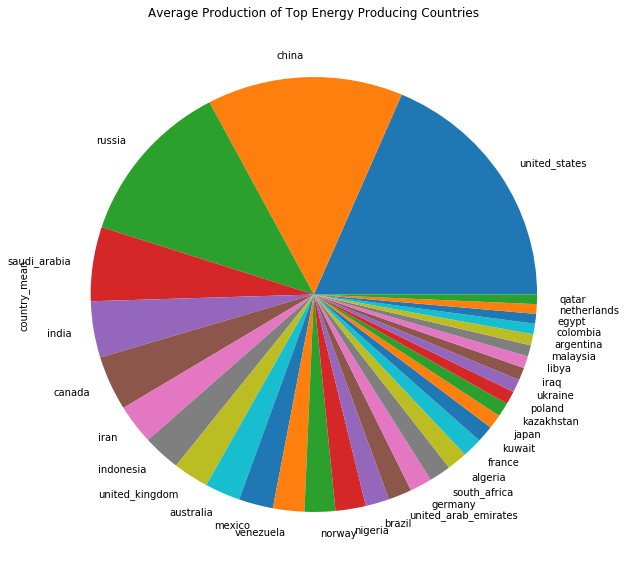

In [61]:
top_prod["country_mean"].plot(kind='pie', title='Average Production of Top Energy Producing Countries', figsize=(10,10))

#### Observations 4
The pie chart above shows the top energy producers globally. This group consists of countries with a 2-decade mean energy production between 58,907.50 and 1,661,000 Tonnes of oil equivalent (toe). The pie chart also suggests that 4 countries, the USA, China, Russia and Saudi Arabia produce approximately 50% of the energy produced by top producers.

In the next code cell, I examine 2 decades of energy production from the top 5 energy producers.

In [62]:
top_prod.to_csv('top_prod.csv', index=False)

In [63]:
# Writing a function for plotting graphs
# The function needs to provide uniform labels for the x and y axes accross the 5 bar charts.
# Then specify the title, but change the country name with each chart

def makebars(y, country= 'United States'):
    title = 'Energy Production in {}'.format(country)
    bar_width = 0.50
    years = np.arange(1990, 2018)
    x = np.arange(len(y))
    fig, ax = plt.subplots()
    ax.bar(x, y, width=bar_width)
    ax.set_xticks(x+(bar_width/2.0))
    ax.set_xticklabels(years, rotation=90)
    ax.set_title(title)
    ax.set_xlabel('Years')
    ax.set_ylabel('Energy Produced (Tonnes of Oil Equivalent)')
    plt.show()

Using this function as it is will require me to write it 5 times for the top 5 producing countries. I will need to do something like this `makebars(top_prod.iloc[0, :-2])` 5 times, where I am changing the row location for each of the 5 countries. Below, I try to mitigate this problem.

In [64]:
#creating a variable, which has a collection of dictionaries that specify 'y' and 'country'
top_prod_params = [
    {
        'y':top_prod.iloc[0, :-2],
        'country':'United States',
    },
    {
        'y':top_prod.iloc[1, :-2],
        'country':'China',
    },
    {
        'y':top_prod.iloc[2, :-2],
        'country':'Russia',
    },
    {
        'y':top_prod.iloc[3, :-2],
        'country':'Saudi Arabia',
    },
    {
        'y':top_prod.iloc[4, :-2],
        'country':'India',
    },
    
]

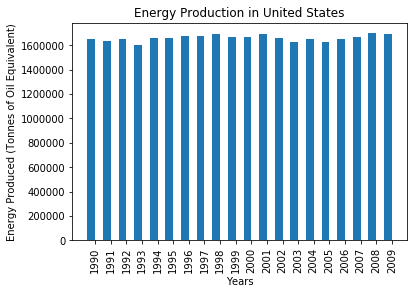

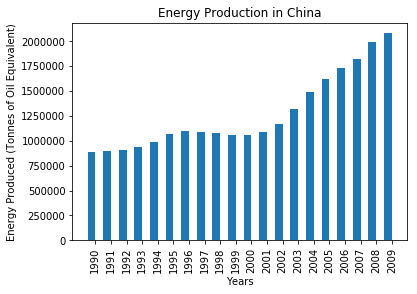

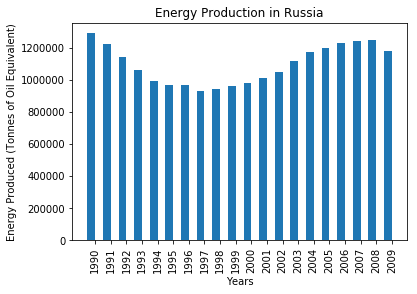

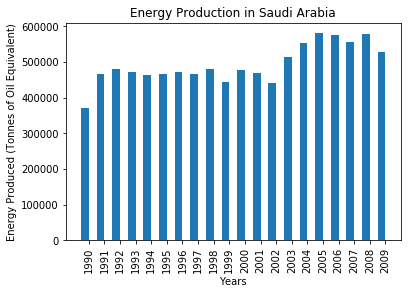

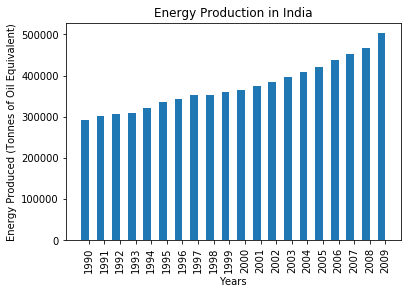

In [65]:
#creating a for loop to plot all my 5 graphs
for params in top_prod_params:
    makebars(params['y'], params['country'])

#### Observation 6
From the bar charts above it can be seen that while countries like the USA and Russia have maintained production levels within the same range over the years, China and India have gradually increased their production over the years.

#### Low Energy Producing Countries

In [66]:
#finding the mean of 2 decades of production
low_prod = df_energy_prod.query('prod_levels == "low producer"')
low_prod = low_prod.sort_values(by = ['country_mean', 'country'], ascending = [True, False])
low_prod.head(6)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,country_mean,prod_levels
country,,,,,,,,,,,,,,,,,,,,,
singapore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,15.0,...,33.0,28.0,26.0,46.0,34.0,24.0,32.0,28,27.166667,low producer
cyprus,6.0,5.0,5.0,5.0,11.0,42.0,43.0,41.0,43.0,43.0,...,44.0,48.0,50.0,51.0,51.0,73.0,82.0,84,40.750000,low producer
hong_kong_china,43.0,43.0,43.0,45.0,45.0,46.0,48.0,48.0,48.0,49.0,...,50.0,50.0,50.0,50.0,51.0,51.0,52.0,52,48.150000,low producer
luxembourg,28.0,30.0,45.0,44.0,45.0,44.0,37.0,42.0,53.0,53.0,...,56.0,58.0,66.0,88.0,91.0,94.0,101.0,106,59.800000,low producer
moldova,57.0,65.0,58.0,63.0,52.0,54.0,91.0,100.0,62.0,63.0,...,75.0,84.0,92.0,88.0,87.0,88.0,102.0,104,76.100000,low producer
lebanon,143.0,151.0,167.0,171.0,185.0,180.0,190.0,201.0,193.0,155.0,...,191.0,252.0,234.0,229.0,200.0,192.0,166.0,174,185.000000,low producer


In [67]:
low_prod.index

Index(['singapore', 'cyprus', 'hong_kong_china', 'luxembourg', 'moldova',
       'lebanon', 'jordan', 'jamaica', 'armenia', 'panama', 'morocco',
       'botswana', 'uruguay', 'senegal', 'israel', 'albania', 'georgia',
       'kyrgyz_republic', 'tajikistan', 'dominican_republic', 'costa_rica',
       'north_macedonia', 'latvia', 'haiti', 'nicaragua', 'togo', 'honduras',
       'benin', 'el_salvador', 'iceland', 'ireland', 'mongolia'],
      dtype='object', name='country')

In [68]:
#plotting low energy producing countries

#creating a variable, which has a collection of dictionaries that specify 'y' and 'country'
low_prod_params = [
    {
        'y':low_prod.iloc[0, :-3],
        'country':'Singapore',
    },
    {
        'y':low_prod.iloc[1, :-3],
        'country':'Cyprus',
    },
    {
        'y':low_prod.iloc[2, :-3],
        'country':'Hong Kong China',
    },
    {
        'y':low_prod.iloc[3, :-3],
        'country':'Luxemborg',
    },
    {
        'y':low_prod.iloc[4, :-3],
        'country':'Moldova',
    },
    
]

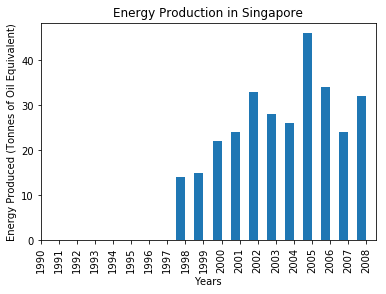

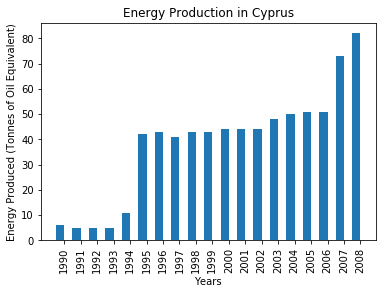

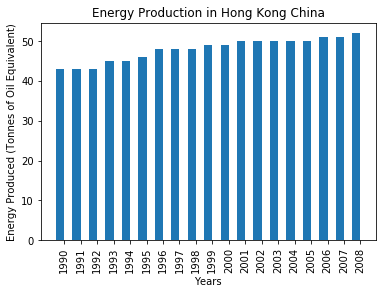

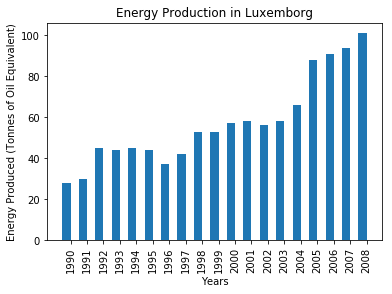

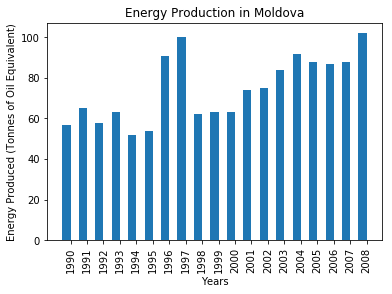

In [69]:
#creating a for loop to plot all my 5 graphs
for params in low_prod_params:
    makebars(params['y'], params['country'])

#### Observation 5
All the low energy producing countries have actually increased their energy production over the years

### Top and Low Energy Consumers

#### Top Energy Consumers

In [70]:
#replacing zeros with NaN to ensure accurate mean, and account for missing values.
df_energy_usepp = df_energy_usepp.replace(0, np.NaN)
#finding the mean of 2 decades of energy consumption
df_energy_usepp['country_mean'] = df_energy_usepp.mean(axis=1)
df_energy_usepp.head(5)


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,country_mean
country,,,,,,,,,,,,,,,,,,,,,
angola,497,492,479,480,471,456,454,449,434,441,...,443,448,468,465,434,459,472,492,515,464.40
albania,813,573,418,412,441,417,448,385,427,576,...,597,660,648,715,720,707,680,711,732,583.00
united_arab_emirates,11200,12100,10900,10800,11400,11500,11500,11600,11200,10900,...,12200,11500,10600,10300,9700,8720,8130,8370,7570,10514.50
argentina,1410,1440,1490,1470,1550,1550,1590,1620,1660,1670,...,1570,1510,1600,1730,1720,1850,1860,1940,1870,1638.50
armenia,2180,2320,1200,652,420,511,562,594,610,594,...,657,618,656,698,843,865,973,1030,904,877.15


In [71]:
#Exploring country mean
df_energy_usepp['country_mean'].describe()

count      133.000000
mean      2480.428195
std       2829.771240
min        149.200000
25%        644.550000
50%       1501.800000
75%       3449.500000
max      17725.000000
Name: country_mean, dtype: float64

In [72]:
#Grouping countries based on their mean energy production
bin_edgess = [ 149.200000, 644.550000, 1501.800000, 3449.500000, 17725.000000 ] # Fill in this list with five values

In [73]:
# Labels for the four levels of production groups
bin_namess = ['low consumer','medium consumer', 'high consumer', 'top consumer' ] 

In [74]:
# Creates usepp_levels column
df_energy_usepp['usepp_levels'] = pd.cut(df_energy_usepp['country_mean'], bin_edgess, labels=bin_namess)

# Checks for successful creation of this column
df_energy_usepp.head(3)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,country_mean,usepp_levels
country,,,,,,,,,,,,,,,,,,,,,
angola,497,492,479,480,471,456,454,449,434,441,...,448,468,465,434,459,472,492,515,464.4,low consumer
albania,813,573,418,412,441,417,448,385,427,576,...,660,648,715,720,707,680,711,732,583.0,low consumer
united_arab_emirates,11200,12100,10900,10800,11400,11500,11500,11600,11200,10900,...,11500,10600,10300,9700,8720,8130,8370,7570,10514.5,top consumer


In [75]:
#grouping top producers
top_usepp = df_energy_usepp.query('usepp_levels == "top consumer"')
top_usepp = top_usepp.sort_values(by = ['country_mean', 'country'], ascending = [False, True]) # Sorting
top_usepp.head(6)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,country_mean,usepp_levels
country,,,,,,,,,,,,,,,,,,,,,
qatar,13700,14800,15200,15600,15500,15900,16500,19000,19300,19800,...,21300,20700,22100,19300,19200,18200,15800,14600,17725.0,top consumer
curaçao,10000,10100,10500,8850,9000,9060,9220,16200,18800,14700,...,16700,15600,16200,15200,14600,16200,15300,15600,13726.5,top consumer
bahrain,10600,10100,10800,11100,11600,11400,11100,12200,12400,11900,...,11500,11600,10900,11700,11600,11200,11300,10300,11350.0,top consumer
iceland,8910,8050,7760,8250,8290,8260,8850,8580,9040,10000,...,10800,10700,10500,10500,12700,14700,16400,16900,10544.5,top consumer
united_arab_emirates,11200,12100,10900,10800,11400,11500,11500,11600,11200,10900,...,11500,10600,10300,9700,8720,8130,8370,7570,10514.5,top consumer
trinidad_and_tobago,4900,4840,5290,5030,5040,4900,5780,5440,6310,7350,...,9360,10400,10900,12400,13800,14600,14100,14200,8552.0,top consumer


In [76]:
top_usepp.index

Index(['qatar', 'curaçao', 'bahrain', 'iceland', 'united_arab_emirates',
       'trinidad_and_tobago', 'luxembourg', 'canada', 'united_states',
       'brunei', 'finland', 'norway', 'sweden', 'australia', 'belgium',
       'singapore', 'saudi_arabia', 'netherlands', 'russia', 'czech_republic',
       'germany', 'new_zealand', 'france', 'estonia', 'gibraltar', 'japan',
       'oman', 'south_korea', 'united_kingdom', 'austria', 'denmark',
       'turkmenistan', 'switzerland'],
      dtype='object', name='country')

In [77]:
#plotting top energy consuming countries

#creating a variable, which has a collection of dictionaries that specify 'y' and 'country'
top_usepp_params = [
    {
        'y':top_usepp.iloc[0, :-2],
        'country':'Quatar',
    },
    {
        'y':top_usepp.iloc[1, :-2],
        'country':'Curaçao',
    },
    {
        'y':top_usepp.iloc[2, :-2],
        'country':'Bahrain',
    },
    {
        'y':top_usepp.iloc[3, :-2],
        'country':'Iceland',
    },
    {
        'y':top_usepp.iloc[4, :-2],
        'country':'United Arab Emirates',
    },
    
]

#'qatar', 'curaçao', 'bahrain', 'iceland', 'united_arab_emirates'

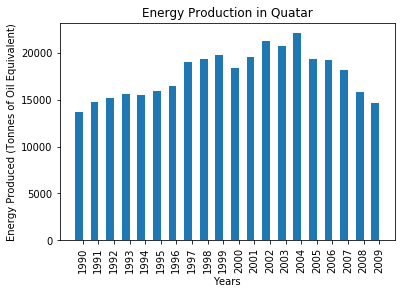

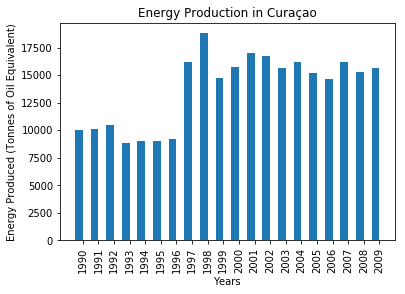

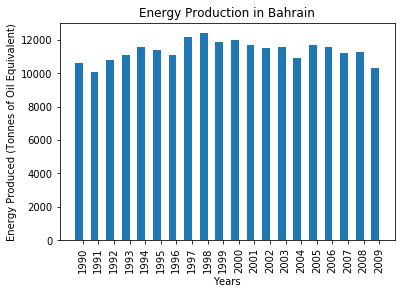

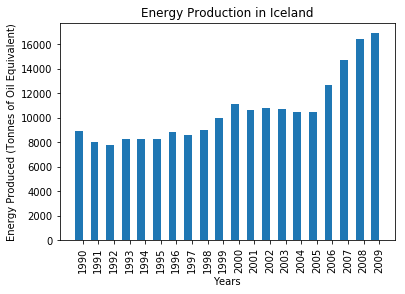

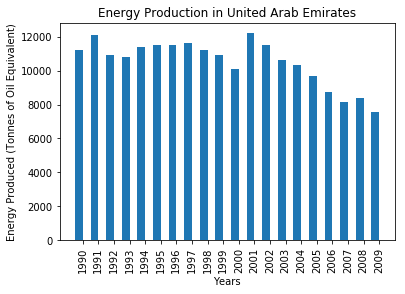

In [78]:
#creating a for loop to plot all my 5 graphs
for params in top_usepp_params:
    makebars(params['y'], params['country'])

Energy consumption has dropped in UAE and Qatar since the early 2000s, but this may be more about population, since energy consumption is per person per country.

#### Low Energy Consumers

In [79]:
#finding the mean of 2 decades of energy consumption
low_usepp = df_energy_usepp.query('usepp_levels == "low consumer"')
low_usepp = low_usepp.sort_values(by = ['country_mean', 'country'], ascending = [True, False])
low_usepp.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,country_mean,usepp_levels
country,,,,,,,,,,,,,,,,,,,,,
senegal,224,216,223,216,208,215,214,222,229,236,...,256,243,253,252,246,257,261,305,238.95,low consumer
haiti,222,217,221,210,189,219,246,255,251,250,...,264,249,253,370,375,387,386,385,271.30,low consumer
yemen,215,249,258,212,211,229,226,232,241,264,...,277,298,317,328,341,324,332,359,274.00,low consumer
myanmar,258,251,255,250,263,269,266,268,272,270,...,272,292,306,304,306,316,303,285,277.35,low consumer
congo_rep,334,339,326,319,268,297,272,253,246,235,...,242,278,286,300,379,325,336,371,294.00,low consumer


In [80]:
low_usepp.index

Index(['senegal', 'haiti', 'yemen', 'myanmar', 'congo_rep', 'congo_dem_rep',
       'nepal', 'benin', 'ghana', 'vietnam', 'sudan', 'cameroon', 'sri_lanka',
       'togo', 'morocco', 'tanzania', 'mozambique', 'india', 'cote_d'ivoire',
       'kenya', 'pakistan', 'tajikistan', 'peru', 'angola', 'philippines',
       'ethiopia', 'nicaragua', 'honduras', 'bolivia', 'guatemala', 'albania',
       'zambia', 'el_salvador'],
      dtype='object', name='country')

In [81]:
medium_usepp = df_energy_usepp.query('usepp_levels == "medium consumer"')
high_usepp = df_energy_usepp.query('usepp_levels == "high consumer"')

In [82]:
medium_usepp.index

Index(['armenia', 'bosnia_and_herzegovina', 'brazil', 'botswana', 'china',
       'colombia', 'costa_rica', 'cuba', 'dominican_republic', 'algeria',
       'ecuador', 'egypt', 'georgia', 'indonesia', 'iraq', 'jamaica', 'jordan',
       'kyrgyz_republic', 'lebanon', 'moldova', 'north_macedonia', 'mongolia',
       'mauritius', 'nigeria', 'panama', 'north_korea', 'paraguay', 'syria',
       'thailand', 'tunisia', 'turkey', 'uruguay', 'zimbabwe'],
      dtype='object', name='country')

In [83]:
high_usepp.index

Index(['argentina', 'azerbaijan', 'bulgaria', 'belarus', 'chile', 'cyprus',
       'spain', 'gabon', 'greece', 'hong_kong_china', 'croatia', 'hungary',
       'ireland', 'iran', 'israel', 'italy', 'kazakhstan', 'libya',
       'lithuania', 'latvia', 'mexico', 'malta', 'malaysia', 'poland',
       'portugal', 'romania', 'serbia', 'slovak_republic', 'slovenia',
       'ukraine', 'uzbekistan', 'venezuela', 'south_africa'],
      dtype='object', name='country')

In [84]:
#plotting top energy consuming countries

#creating a variable, which has a collection of dictionaries that specify 'y' and 'country'
low_usepp_params = [
    {
        'y':low_usepp.iloc[0, :-2],
        'country':'Senegal',
    },
    {
        'y':low_usepp.iloc[1, :-2],
        'country':'Haiti',
    },
    {
        'y':low_usepp.iloc[2, :-2],
        'country':'Yemen',
    },
    {
        'y':low_usepp.iloc[3, :-2],
        'country':'Myanmar',
    },
    {
        'y':low_usepp.iloc[4, :-2],
        'country':'Congo Rep',
    },
    
]

#'senegal', 'haiti', 'yemen', 'myanmar', 'congo_rep',

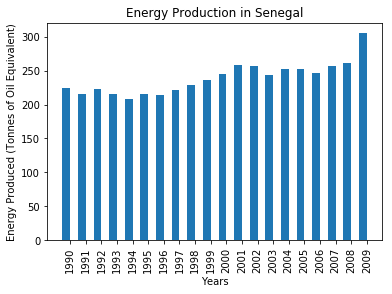

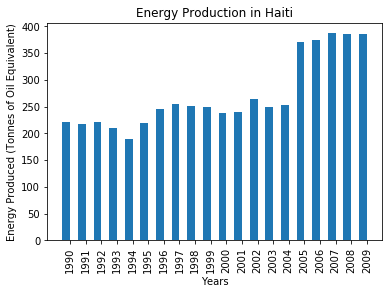

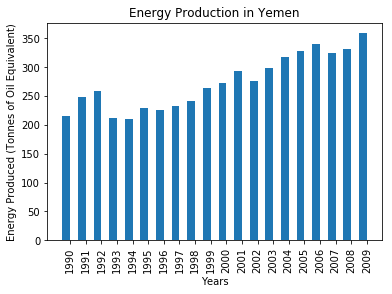

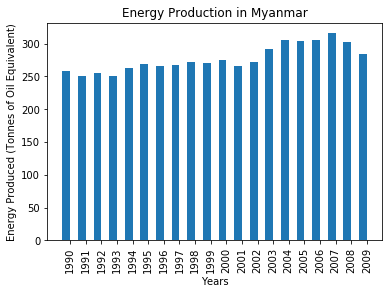

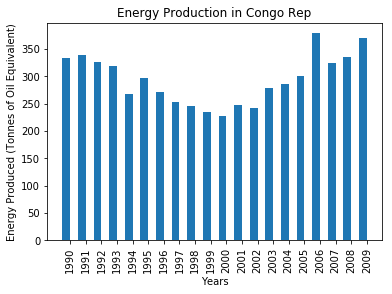

In [85]:
#creating a for loop to plot all my 5 graphs
for params in low_usepp_params:
    makebars(params['y'], params['country'])

In these group of countries, only Senegal has consistently increased their energy consumption over the years. Also, all the countries in this group are developing/least developed countries

### Exploring Consumption CO2 per capita

#### Top Consumption CO2 per capita countries

In [86]:
#finding the mean of of Consumption CO2 per capita
df_co2_consump = df_co2_consump.replace(0, np.NaN)
df_co2_consump['country_mean'] = df_co2_consump.mean(axis=1)
df_co2_consump.head(5)


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,country_mean
country,,,,,,,,,,,,,,,,,,,,,
albania,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.333333
united_arab_emirates,30.0,31.0,30.0,31.0,32.0,31.0,30.0,29.0,32.0,27.0,...,25.0,22.0,24.0,26.0,26.0,27.0,24.0,25.0,24.0,29.357143
argentina,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.321429
armenia,3.0,3.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.416667
australia,13.0,13.0,13.0,13.0,13.0,13.0,13.0,14.0,14.0,14.0,...,17.0,17.0,17.0,17.0,16.0,15.0,15.0,15.0,15.0,14.892857


In [87]:
#Exploring country mean
df_co2_consump['country_mean'].describe()

count    100.000000
mean       7.256568
std        6.785282
min        1.000000
25%        1.732143
50%        5.285714
75%       10.482143
max       33.928571
Name: country_mean, dtype: float64

In [88]:
#Grouping countries based on their mean energy production
bin_edgess = [ 1.00, 1.732143, 5.285714, 10.482143, 33.928571 ] 

In [89]:
# Labels for the four levels of Consumption CO2 per capita groups
bin_namess = ['low CO2','medium CO2', 'high CO2', 'top CO2' ] 

In [90]:
# Creates CO2_levels column
df_co2_consump['CO2_levels'] = pd.cut(df_co2_consump['country_mean'], bin_edgess, labels=bin_namess)

# Checks for successful creation of this column
df_co2_consump.head(3)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,country_mean,CO2_levels
country,,,,,,,,,,,,,,,,,,,,,
albania,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.333333,low CO2
united_arab_emirates,30.0,31.0,30.0,31.0,32.0,31.0,30.0,29.0,32.0,27.0,...,22.0,24.0,26.0,26.0,27.0,24.0,25.0,24.0,29.357143,top CO2
argentina,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.321429,medium CO2


In [91]:
#grouping top CO2
top_co2 = df_co2_consump.query('CO2_levels == "top CO2"')
top_co2 = top_co2.sort_values(by = ['country_mean', 'country'], ascending = [False, True])
top_co2.head(5)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,country_mean,CO2_levels
country,,,,,,,,,,,,,,,,,,,,,
luxembourg,31.0,32.0,31.0,31.0,28.0,22.0,22.0,20.0,18.0,18.0,...,47.0,19.0,44.0,43.0,40.0,41.0,39.0,39.0,30.392857,top CO2
united_arab_emirates,30.0,31.0,30.0,31.0,32.0,31.0,30.0,29.0,32.0,27.0,...,22.0,24.0,26.0,26.0,27.0,24.0,25.0,24.0,29.357143,top CO2
singapore,22.0,23.0,24.0,24.0,26.0,24.0,27.0,29.0,23.0,25.0,...,22.0,20.0,22.0,22.0,22.0,21.0,20.0,20.0,23.964286,top CO2
kuwait,17.0,11.0,16.0,25.0,29.0,29.0,24.0,25.0,27.0,20.0,...,25.0,22.0,23.0,23.0,21.0,21.0,22.0,21.0,22.000000,top CO2
united_states,20.0,19.0,20.0,20.0,20.0,20.0,20.0,21.0,21.0,21.0,...,19.0,19.0,18.0,18.0,18.0,18.0,17.0,17.0,19.892857,top CO2


In [92]:
top_co2.index

Index(['luxembourg', 'united_arab_emirates', 'singapore', 'kuwait',
       'united_states', 'canada', 'belgium', 'bahrain', 'hong_kong_china',
       'australia', 'trinidad_and_tobago', 'finland', 'switzerland',
       'saudi_arabia', 'estonia', 'brunei', 'germany', 'ireland',
       'netherlands', 'czech_republic', 'denmark', 'austria', 'israel',
       'japan'],
      dtype='object', name='country')

In [93]:
#plotting top energy consuming countries

#creating a variable, which has a collection of dictionaries that specify 'y' and 'country'
top_co2_params = [
    {
        'y':top_co2.iloc[0, :-2],
        'country':'Luxembourg',
    },
    {
        'y':top_co2.iloc[1, :-2],
        'country':'United Arab Emirates',
    },
    {
        'y':top_co2.iloc[2, :-2],
        'country':'Singapore',
    },
    {
        'y':top_co2.iloc[3, :-2],
        'country':'Kuwait',
    },
    {
        'y':top_co2.iloc[4, :-2],
        'country':'United States',
    },
    
]

#'luxembourg', 'united_arab_emirates', 'singapore', 'kuwait', 'united_states'

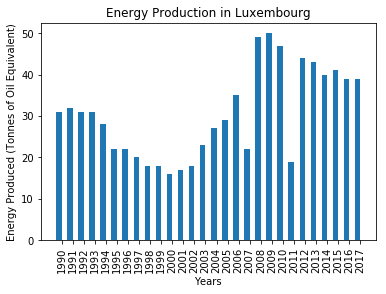

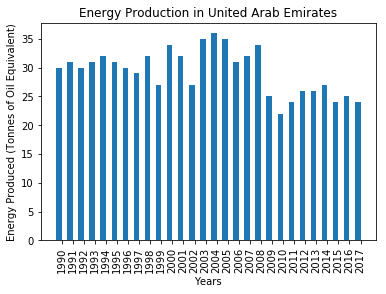

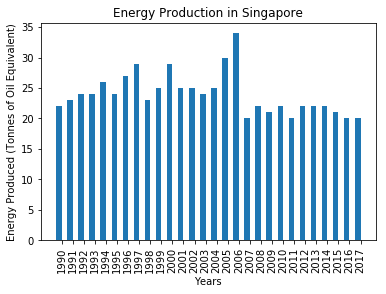

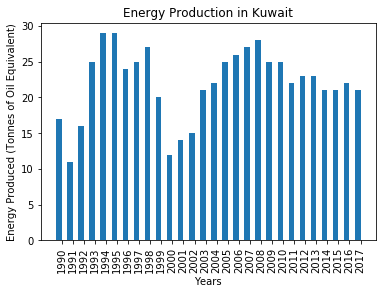

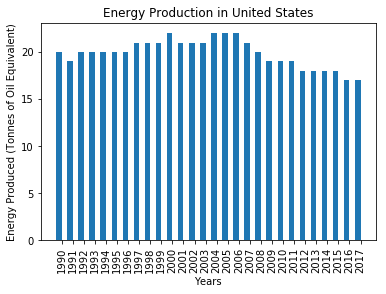

In [94]:
#creating a for loop to plot all my 5 graphs
for params in top_co2_params:
    makebars(params['y'], params['country'])

In this group, 2 countries, Singapore and Luxemborg, that were listed among the top 5 lowest energy producers are also among the top 5 CO2 emitters. Also, the United Arab Emirates and the USA, top CO2 emitters, are among the top energy producers and top energy consumers.

#### Low Consumption CO2 per capita countries

In [95]:
#finding the mean of of Consumption CO2 per capita
low_co2 = df_co2_consump.query('CO2_levels == "low CO2"')
low_co2 = low_co2.sort_values(by = ['country_mean', 'country'], ascending = [True, False])
low_co2.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,country_mean,CO2_levels
country,,,,,,,,,,,,,,,,,,,,,
zimbabwe,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.181818,low CO2
peru,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.192308,low CO2
indonesia,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.200000,low CO2
colombia,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.250000,low CO2
vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.333333,low CO2


In [96]:
low_co2.index

Index(['zimbabwe', 'peru', 'indonesia', 'colombia', 'vietnam', 'albania',
       'brazil', 'lao', 'armenia', 'georgia', 'egypt', 'tunisia'],
      dtype='object', name='country')

In [97]:
#plotting low consumption CO2 per capita countries

#creating a variable, which has a collection of dictionaries that specify 'y' and 'country'
low_co2_params = [
    {
        'y':low_co2.iloc[0, :-2],
        'country':'Zimbabwe',
    },
    {
        'y':low_co2.iloc[1, :-2],
        'country':'Peru',
    },
    {
        'y':low_co2.iloc[2, :-2],
        'country':'Indonesia',
    },
    {
        'y':low_co2.iloc[3, :-2],
        'country':'Columbia',
    },
    {
        'y':low_co2.iloc[4, :-2],
        'country':'Vietnam',
    },
    
]

#'zimbabwe', 'peru', 'indonesia', 'colombia', 'vietnam'

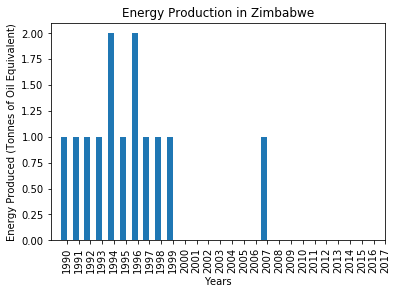

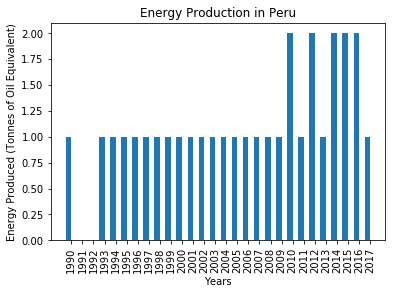

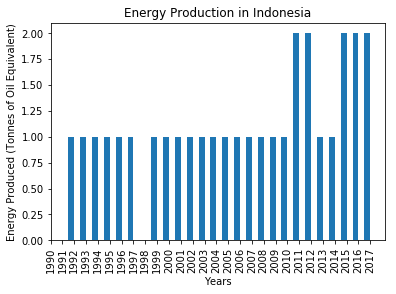

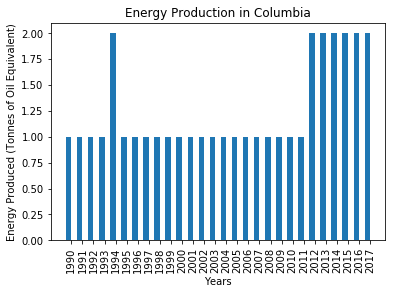

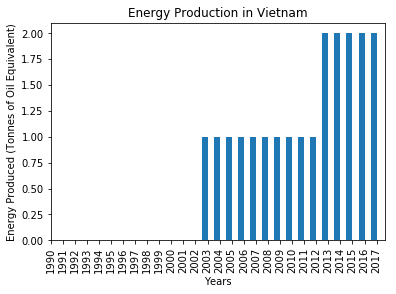

In [98]:
#creating a for loop to plot all my 5 graphs
for params in low_co2_params:
    makebars(params['y'], params['country'])

In Vietnam, Indonesia, Peru, and Zimbabwe, the value of Consumption CO2 per capita  stayed the same for some years. In reality, this is almost impossible because factors such as population figures, infrastructure development activities etc might cause a fluctuation in Consumption CO2 per capita, and these factors tend to change year in and year out, at different rates, in different countries.

In [99]:
medium_co2 = df_co2_consump.query('CO2_levels == "medium CO2"')
high_co2 = df_co2_consump.query('CO2_levels == "high CO2"')

In [100]:
medium_co2.index

Index(['argentina', 'azerbaijan', 'bulgaria', 'botswana', 'chile', 'china',
       'costa_rica', 'dominican_republic', 'ecuador', 'croatia', 'iran',
       'jamaica', 'jordan', 'kyrgyz_republic', 'mexico', 'mongolia',
       'mauritius', 'namibia', 'panama', 'romania', 'thailand', 'turkey',
       'ukraine', 'uruguay', 'venezuela'],
      dtype='object', name='country')

In [101]:
high_co2.index

Index(['belarus', 'cyprus', 'spain', 'france', 'united_kingdom', 'greece',
       'hungary', 'italy', 'kazakhstan', 'south_korea', 'lithuania', 'latvia',
       'malta', 'malaysia', 'norway', 'new_zealand', 'oman', 'poland',
       'portugal', 'russia', 'slovak_republic', 'slovenia', 'sweden', 'taiwan',
       'south_africa'],
      dtype='object', name='country')

<a id='conclusions'></a>
## Conclusions

The main aim of this project was to explore trends on energy production, consumption and CO<sub>2</sub> emissions within two decades (1990-2009) from around the world. To achieve this aim, the following questions were asked:

* Which countries are the top and least energy producers?
* Which countries consume the most and least energy?
* Which countries are the highest and lowest CO<sub>2</sub> emitters? 

Here are the main findings from the 3 datasets which provided information on energy production, consumption and CO<sub>2</sub> emission from around the world:

> **Two decades of Energy Production**: In this project it was seen that between 1990 and 2009, the top 5 energy producers were the United States, China, Russia, Saudi Arabia, India and Canada. It was also seen that the lowest producers were Singapore, Cyprus, Hong Kong China, Luxembourg and Moldova.

> **Two decades of Energy Use Per Person**: Interestingly, none of the top 5 energy producers made it to the top 5 energy consumers as the top 5 consumers of Energy were Qatar, Curaçao, Bahrain, Iceland and United Arab Emirates. Canada and United States on the list of Top Energy Consumers were at position 7 and 8 respectively. This suggests that the top 5 energy producers may not be consuming all the energy that they are producing. Also, it is important to restate that this indicator, Energy Use Per person, is a function of the country's population. A suggestion for further studies would be to place consumption figures at par with population figures. Another interesting insight is that all the top energy producers and consumers are either developed countries or high developing countries. Moving now to low energy consumers, the top 5 were Senegal, Haiti, Yemen, Myanmar and Congo Rep - all of which are low developing countries. 

> **Two decades of CO<sub>2</sub> Emissions per Capita Per Person**: The top 5 CO<sub>2</sub> emitters are Luxembourg, United Arab Emirates, Singapore, Kuwait, the United States. Canada made the 6th position. To avoid implying causation where the situation may be more linked to corelation, it is important to  highlight that energy production or consumption is not always the cause of CO<sub>2</sub> emission. Thus, in higlighting trends, a key pointis that 2 countries, Singapore and Luxemborg, that were listed among the top 5 lowest energy producers are also among the top 5 CO<sub>2</sub> emitters. Again, recall that this indicator is also a funtion of population and consumption of CO<sub>2</sub>. Also, the United Arab Emirates, a top CO<sub>2</sub> emitter, is among the top 5 energy consumers. Low CO<sub>2</sub> emitters include Zimbabwe, Peru, Indonesia, Colombia, and Vietnam.



## Limitations
Two of the three parameters explored in this project were calculated based on population. Further insights can be drawn if trends were placed at par with population figures. Also, it may be useful to compare energy production, consumption and CO<sub>2</sub> emissions over the same period of time. In this project, while data for energy production and consumption spanned over similar years, data for CO<sub>2</sub> emission didn't.

## References:
1. Eliminating k, M and decimals: [Stackoverflow Solution](https://stackoverflow.com/questions/39684548/convert-the-string-2-90k-to-2900-or-5-2m-to-5200000-in-pandas-dataframe)
2. Comparing Columns: [Stack Exchange Blog Post](https://datascience.stackexchange.com/questions/33053/how-do-i-compare-columns-in-different-data-frames)
3. Calculating mean without zero values: [Stackoverflow Solution](https://stackoverflow.com/questions/33217636/mean-calculation-in-pandas-excluding-zeros)
4. Avoiding repititive code for plotting graphs: [Temiloluwa Ojo](https://dev.to/codekagei)